In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.size'] = 7

In [2]:
from spinePopModels.intensity_funcs import inten
from spinePopModels.poisson_processes import hpp, nhpp
from spinePopModels.gillespie import gillespie_plus

In [3]:
# hold at highest point of estradiol (midpoint of proestrus, tind=36)

fixed_tind = 36
init = [1,6,23,2]

times = np.arange(0, 96*6+.25, 0.25)

res_list = []
for i in tqdm(range(8)):
    res_gillespie_plus = gillespie_plus(init, times, inten, nhpp, fixed_tind)
    res_list.append(res_gillespie_plus)


  0%|          | 0/8 [00:00<?, ?it/s]/Users/dmartins/Documents/GitHub/spine-population-modeling/spinePopModels/poisson_processes.py:20: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(lambda x: sum(inten(tottime + x, pops, transition_dict)), 0, X, limit=200)
100%|██████████| 8/8 [1:06:48<00:00, 501.01s/it]


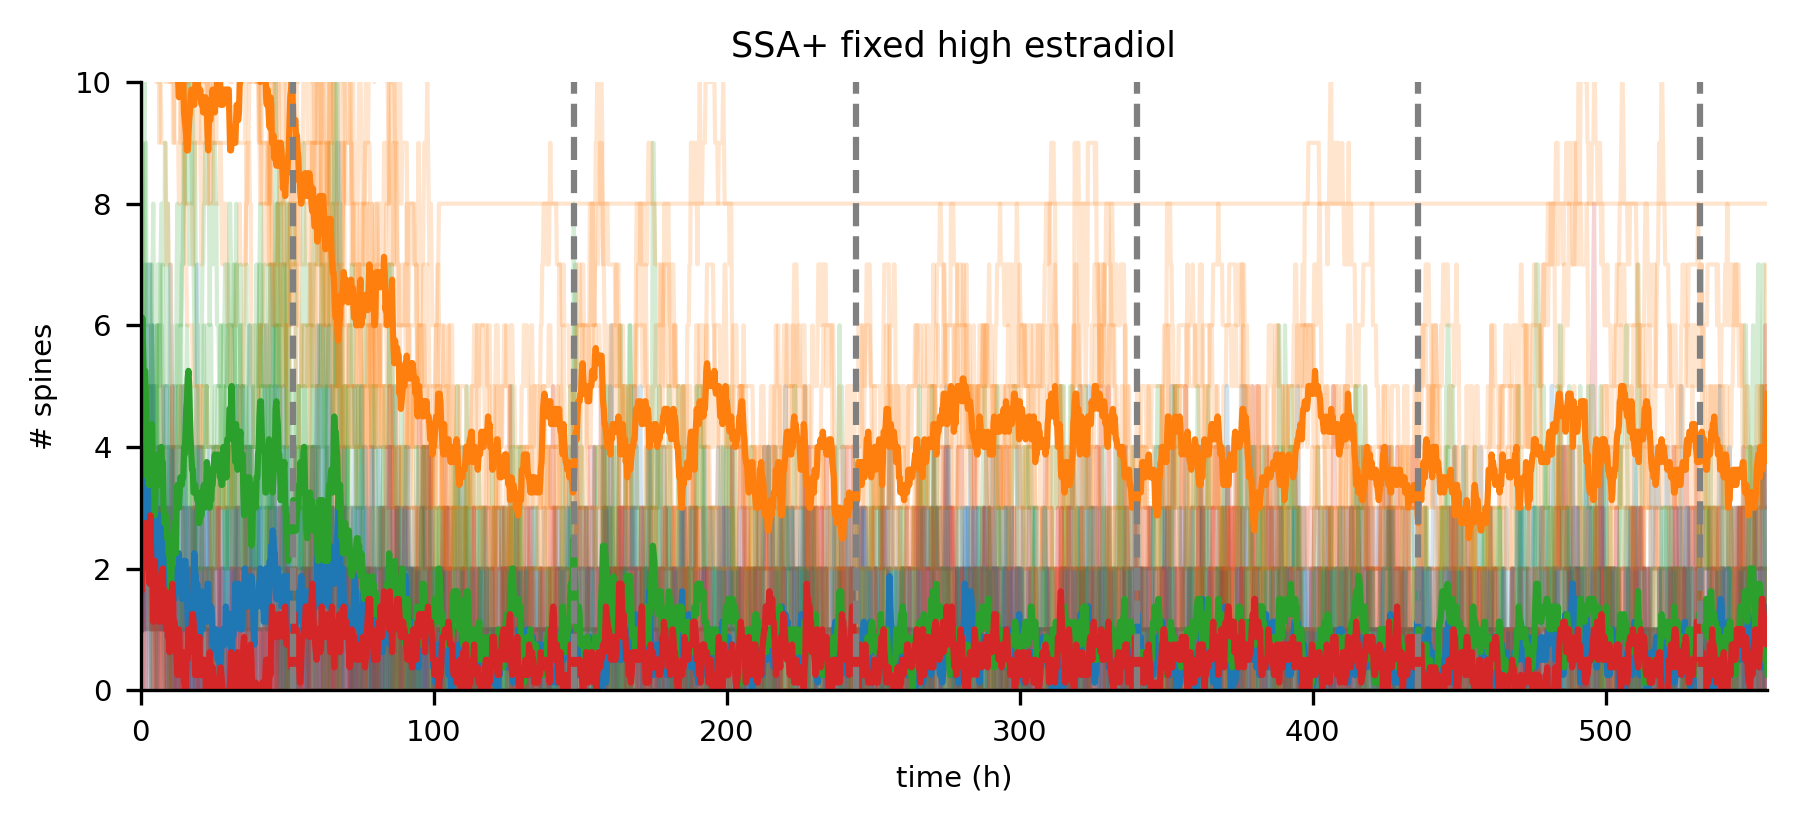

In [10]:
averages = np.zeros([
    np.size(res_list[0],0),
    4,
    8
])

fig, ax = plt.subplots(1, 1, dpi=300, figsize=(6,2.75))
for i in range(8):
    res_gillespie_plus = res_list[i]
    ax.plot(res_gillespie_plus[:,0], res_gillespie_plus[:,1], label='F', lw=1, color='tab:blue', alpha=0.2)
    ax.plot(res_gillespie_plus[:,0], res_gillespie_plus[:,2], label='H', lw=1, color='tab:green', alpha=0.2)
    ax.plot(res_gillespie_plus[:,0], res_gillespie_plus[:,3], label='S', lw=1, color='tab:orange', alpha=0.2)
    ax.plot(res_gillespie_plus[:,0], res_gillespie_plus[:,4], label='M', lw=1, color='tab:red', alpha=0.2)

    averages[:,0,i] = res_gillespie_plus[:,1]
    averages[:,1,i] = res_gillespie_plus[:,2]
    averages[:,2,i] = res_gillespie_plus[:,3]
    averages[:,3,i] = res_gillespie_plus[:,4]

ax.plot(res_gillespie_plus[:,0], np.nanmean(averages[:,0,:], 1), color='tab:blue')
ax.plot(res_gillespie_plus[:,0], np.nanmean(averages[:,1,:], 1), color='tab:green')
ax.plot(res_gillespie_plus[:,0], np.nanmean(averages[:,2,:], 1), color='tab:orange')
ax.plot(res_gillespie_plus[:,0], np.nanmean(averages[:,3,:], 1), color='tab:red')

ax.vlines(
    res_gillespie_plus[:,0][np.argwhere(res_gillespie_plus[:,0]%96==52).T],
    0,
    20,
    ls='--',
    color='gray'
)

ax.set_ylim([0,10])
ax.set_xlim([0,555])
ax.set_xlabel('time (h)')
ax.set_ylabel('# spines')
ax.set_title('SSA+ fixed high estradiol')
fig.tight_layout()
fig.savefig('ssa_plus_fixed_high_estradiol.svg')